# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:\\Users\SamuelWork\Downloads\data'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
temp = app_train[['TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]

In [7]:
temp

,TARGET,DAYS_EMPLOYED,DAYS_BIRTH
0,1,-637.0,9461
1,0,-1188.0,16765
2,0,-225.0,19046
3,0,-3039.0,19005
4,0,-3038.0,19932
...,...,...,...
307506,0,-236.0,9327
307507,0,NaN,20775
307508,0,-7921.0,14966
307509,1,-4786.0,11961


In [8]:
temp['DAYS_EMPLOYED'] = abs(temp['DAYS_EMPLOYED'])

C:\Users\SamuelWork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
temp

,TARGET,DAYS_EMPLOYED,DAYS_BIRTH
0,1,637.0,9461
1,0,1188.0,16765
2,0,225.0,19046
3,0,3039.0,19005
4,0,3038.0,19932
...,...,...,...
307506,0,236.0,9327
307507,0,NaN,20775
307508,0,7921.0,14966
307509,1,4786.0,11961


In [10]:
temp = temp.dropna()
temp

,TARGET,DAYS_EMPLOYED,DAYS_BIRTH
0,1,637.0,9461
1,0,1188.0,16765
2,0,225.0,19046
3,0,3039.0,19005
4,0,3038.0,19932
...,...,...,...
307504,0,7258.0,16705
307506,0,236.0,9327
307508,0,7921.0,14966
307509,1,4786.0,11961


In [11]:
temp['YEARS_EMPLOYED'] = temp['DAYS_EMPLOYED']/365
temp['AGE'] = temp['DAYS_BIRTH']/365
temp

C:\Users\SamuelWork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SamuelWork\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,DAYS_EMPLOYED,DAYS_BIRTH,YEARS_EMPLOYED,AGE
0,1,637.0,9461,1.745205,25.920548
1,0,1188.0,16765,3.254795,45.931507
2,0,225.0,19046,0.616438,52.180822
3,0,3039.0,19005,8.326027,52.068493
4,0,3038.0,19932,8.323288,54.608219
...,...,...,...,...,...
307504,0,7258.0,16705,19.884932,45.767123
307506,0,236.0,9327,0.646575,25.553425
307508,0,7921.0,14966,21.701370,41.002740
307509,1,4786.0,11961,13.112329,32.769863


In [16]:
temp['AGE'].describe()

count    252137.000000
mean         40.463379
std          10.034449
min          20.517808
25%          32.260274
50%          39.926027
75%          48.117808
max          69.041096
Name: AGE, dtype: float64

In [20]:
interval = []
for i in range(20, 70, 5):
    interval.append(i)
interval.append(70)
print(interval)
temp['AGE_BINNED'] = pd.cut(temp['AGE'], interval, include_lowest=True)
temp

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]


C:\Users\SamuelWork\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,DAYS_EMPLOYED,DAYS_BIRTH,YEARS_EMPLOYED,AGE,AGE_BINNED
0,1,637.0,9461,1.745205,25.920548,"(25.0, 30.0]"
1,0,1188.0,16765,3.254795,45.931507,"(45.0, 50.0]"
2,0,225.0,19046,0.616438,52.180822,"(50.0, 55.0]"
3,0,3039.0,19005,8.326027,52.068493,"(50.0, 55.0]"
4,0,3038.0,19932,8.323288,54.608219,"(50.0, 55.0]"
...,...,...,...,...,...,...
307504,0,7258.0,16705,19.884932,45.767123,"(45.0, 50.0]"
307506,0,236.0,9327,0.646575,25.553425,"(25.0, 30.0]"
307508,0,7921.0,14966,21.701370,41.002740,"(40.0, 45.0]"
307509,1,4786.0,11961,13.112329,32.769863,"(30.0, 35.0]"


In [25]:
df_group_age = temp.groupby('AGE_BINNED')['TARGET'].mean()
df_group_age

AGE_BINNED
(19.999, 25.0]    0.122722
(25.0, 30.0]      0.111447
(30.0, 35.0]      0.102594
(35.0, 40.0]      0.089336
(40.0, 45.0]      0.078174
(45.0, 50.0]      0.073991
(50.0, 55.0]      0.067840
(55.0, 60.0]      0.058527
(60.0, 65.0]      0.046597
(65.0, 70.0]      0.028951
Name: TARGET, dtype: float64

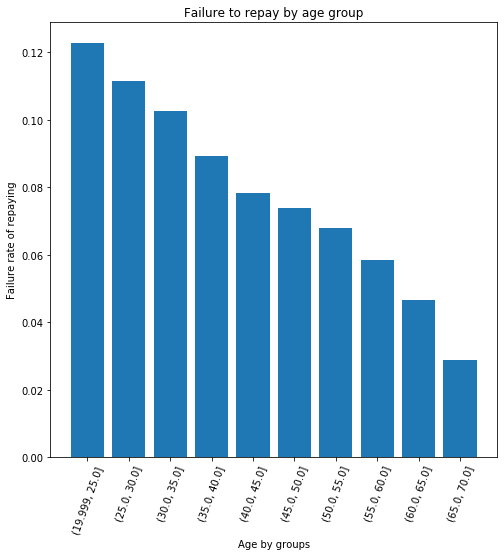

In [34]:
plt.figure(figsize=(8,8))
plt.bar(x=range(len(df_group_age)), height=df_group_age)
plt.title('Failure to repay by age group')
plt.xlabel('Age by groups')
plt.ylabel('Failure rate of repaying')
plt.xticks(ticks=range(len(df_group_age)), labels=df_group_age.index, rotation = 70)
plt.show()